In [1]:
from specim_test.specim.specfuncs import spec2d, spec1d

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#infile = '../galaxy_spectra/lris-longslit-red-1120/spec2d_r201121_0030-J0040+2555_LRISr_2020Nov21T045325.037.fits'
#infile = '../galaxy_spectra/lris-longslit-red-1120/spec2d_r201121_0031-J0040+2555_LRISr_2020Nov21T051705.971.fits'
#infile = '../galaxy_spectra/spec2d_r201121_0043-J0805+6919_LRISr_2020Nov21T152211.856.fits'

In [2]:
infile = '../spectra_extraction/sp1_fill_new.fits'

In [3]:
#spec1 = spec2d.Spec2d(infile, hext=12, xtrim=[40, 170]) #  xtrim=[40, 500]
spec1 = spec2d.Spec2d(infile) #  xtrim=[40, 500]


Loading file ../spectra_extraction/sp1_fill_new.fits
-----------------------------------------------
Read in 2-dimensional spectrum from ../spectra_extraction/sp1_fill_new.fits (HDU=0)
Final data dimensions (x y): 4096 x 131

Dispersion axis:              x
N_pixels along dispersion axis: 4096



In [ ]:
spec1.set_dispaxis('y')

In [ ]:
spec1.subtract_sky_2d(outfile='sky_subtracted_using_pypeit_model_frame31.fits', use_skymod=True)
#spec1.szap(outfile='sky_subtracted_and_szapped3.fits', use_skymod=True)

### To subtract sky from original data here we are using pypeit generated sky model. Also using 'szap' function in spec2d.py cosmic ray rejection procedure is taken care of. Then this sky subtracted and cosmic ray rejected data are being used for 1d spectra extraction.

In [ ]:
spec1.display_spec(use_skymod=True, doszap=False)

In [ ]:
spec1.do_waverect(doplot=True)

Profile max value (before normalization) 803.180969


<IPython.core.display.Javascript object>


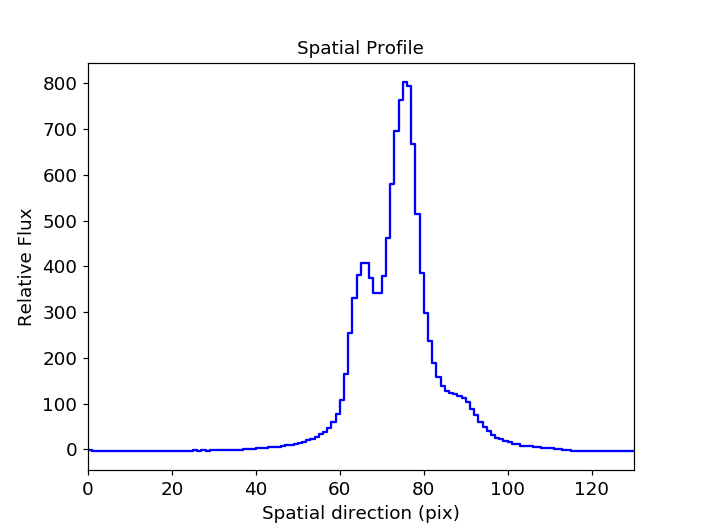

In [10]:
%matplotlib notebook
profile = spec1.spatial_profile(pixrange=[1600, 3000])

In [ ]:
## These are the values we used as initial guess for profiles

# if two Gaussian  
# co = 2
# gauss 1 (primary peak) = 205, 48, 3
# gauss 2 (secondary peak) = 164, 59, 3

# primary peak = 205, 48, 3, 4.765 (for Moffat profile) or 560, 75, 3 (if gaussian profile is used)

### Here we are going to use three Gaussian profile and one Moffat profile to fit the total profile.


To create an initial model you first need to enter degree of background polynomial(<3) and number of Gaussian and Moffat profile as integers.
Order of background polynomial : 0
Number of Gaussian profile : 3
Number of Moffat profile : 0

Now enter constants of the background polynomial upto degree 0
c0 : -3

Enter parameter values for a Gaussian profile in following format...
amplitude_value, mu_value, sigma_value

Parameters of Gaussian profile 1 : 400, 65, 3

amplitude=400.000000, mu=65.000000, sigma=3.000000

Parameters of Gaussian profile 2 : 800, 75, 3

amplitude=800.000000, mu=75.000000, sigma=3.000000

Parameters of Gaussian profile 3 : 110, 90,3

amplitude=110.000000, mu=90.000000, sigma=3.000000

Fitted model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2] + [3]
Components: 
    [0]: <Polynomial1D(0, c0=-2.43651392)>

    [1]: <Gaussian1D(amplitude=299.83589934, mean=66.0357857, stddev=2.73067966)>

    [2]: <Gau

<IPython.core.display.Javascript object>


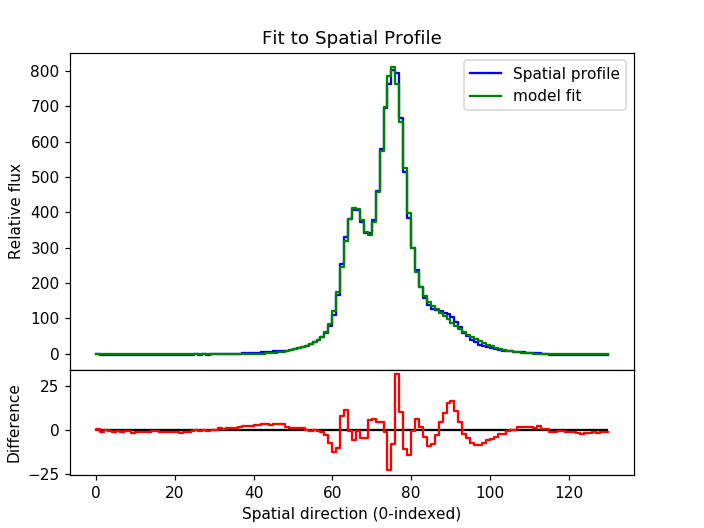

<IPython.core.display.Javascript object>


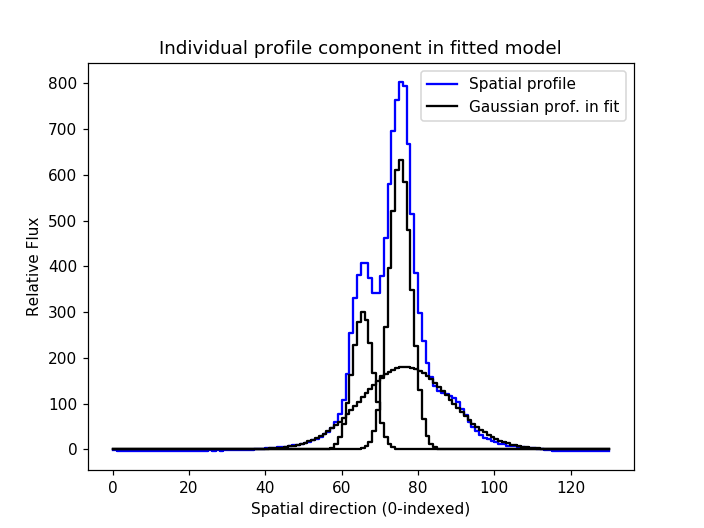


Do you want to start over ? : type yes/no
no


In [11]:
mod = spec1.initial_model()

### Distance between peaks has been fixed using image of the system.

In [12]:
# impose constraints
def tie_gamma(model):
     
    return model.gamma_2
    
def tie_alpha(model):
     
    return model.alpha_2                   
                    
def tie_pos1_gauss(model):
    return model.mean_2 - 10.68

def tie_pos1_moffat(model):
     return model.x_0_2 - 10.68
            
def tie_pos2_gauss(model):
     return model.mean_2 + 14.03
    
def tie_pos2_moffat(model):
    return model.x_0_2 + 14.03

# for two Gaussian and one Moffat  
#mod[1].mean.tied = tie_pos1_moffat 
#mod[2].mean.tied = tie_pos2_moffat 

# for two Gaussian profile
mod[1].mean.tied = tie_pos1_gauss 
mod[3].mean.tied = tie_pos2_gauss 

# for two Moffat profile
#mod[1].x_0.tied = tie_pos1_moffat
#mod[3].x_0.tied = tie_pos2_moffat


#mod[1].amplitude = 1
#mod[2].amplitude = 1
#mod[3].amplitude = 1
#mod[1].x_0 = 66
#mod[2].x_0 = 76
#mod[3].x_0 = 93
#mod[1].x_0.fixed =True
#mod[2].x_0.fixed =True
#mod[3].x_0.fixed =True
#mod[1].gamma = 3.8
#mod[2].gamma = 12
#mod[3].gamma = 4.5

#mod[1].gamma.fixed =True
#mod[2].gamma.fixed =True
#mod[3].gamma.fixed =True
#mod[1].alpha = 1.24
#mod[2].alpha = 5.8
#mod[3].alpha = 1.0
#mod[1].alpha.fixed =True
#mod[2].alpha.fixed =True
#mod[3].alpha.fixed =True

#mod[3].x_0.tied = tie_pos
#mod[1].alpha.tied = tie_alpha
#mod[3].alpha.tied = tie_alpha

#mod[1].gamma.tied = tie_gamma
#mod[3].gamma.tied = tie_gamma


Initial model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2] + [3]
Components: 
    [0]: <Polynomial1D(0, c0=-2.43651392)>

    [1]: <Gaussian1D(amplitude=299.83589934, mean=66.0357857, stddev=2.73067966)>

    [2]: <Gaussian1D(amplitude=634.38300089, mean=75.81778489, stddev=2.90592364)>

    [3]: <Gaussian1D(amplitude=180.94555023, mean=77.2190704, stddev=11.64431138)>
Parameters:
            c0_0           amplitude_1     ...       mean_3           stddev_3     
    ------------------- ------------------ ... ----------------- ------------------
    -2.4365139236639903 299.83589933958433 ... 77.21907040319674 11.644311383734875

-------------------------------------------


Fitted model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2] + [3]
Components: 
    [0]: <Polynomial1D(0, c0=1.25820029)>

    [1]: <Gaussian1D(amplitude=379.25942336, mean=65.25701471,

<IPython.core.display.Javascript object>


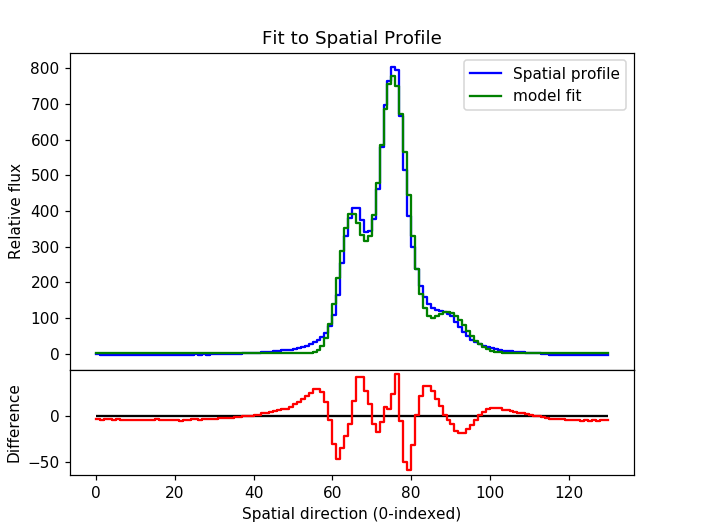

<IPython.core.display.Javascript object>


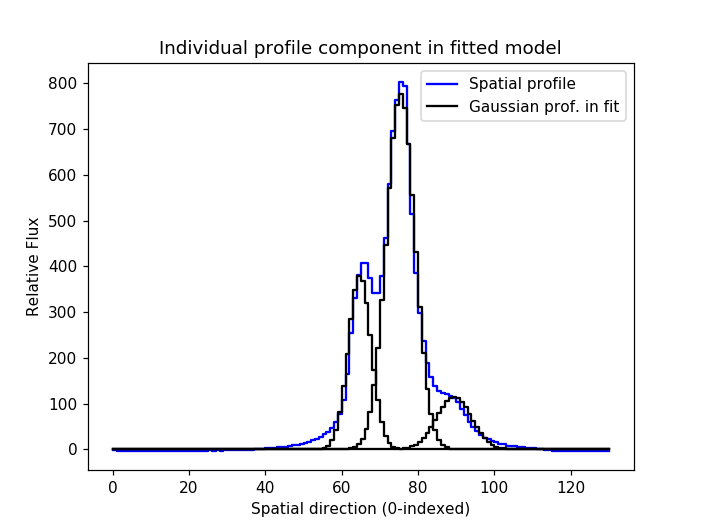

In [13]:
 mod_new = spec1.refined_model(mod)


Running fit_trace
---------------------------------------------------------
Fitting to the trace at 163 segments
  of the 2D spectrum with stepsize=25 pix ...
    Done
Fitting polynomial of degree 3 to parameter: c0_0
Fitting polynomial of degree 3 to parameter: mean_1
Fitting polynomial of degree 3 to parameter: stddev_1
Fitting polynomial of degree 3 to parameter: mean_2
Fitting polynomial of degree 3 to parameter: stddev_2
Fitting polynomial of degree 3 to parameter: mean_3
Fitting polynomial of degree 3 to parameter: stddev_3


<IPython.core.display.Javascript object>


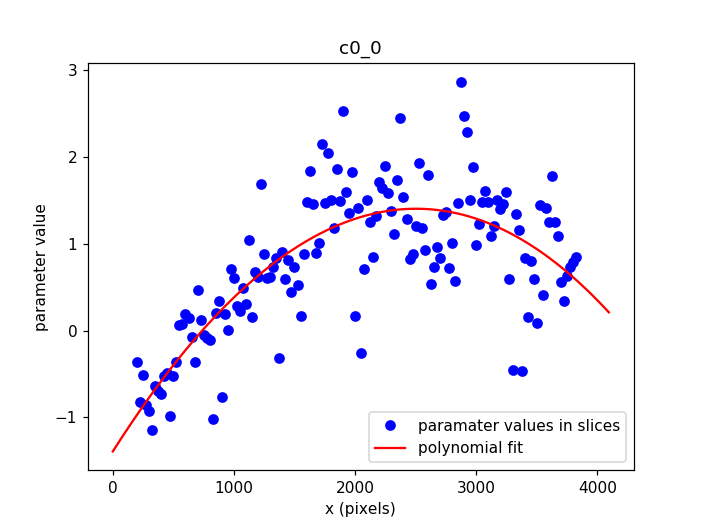

<IPython.core.display.Javascript object>


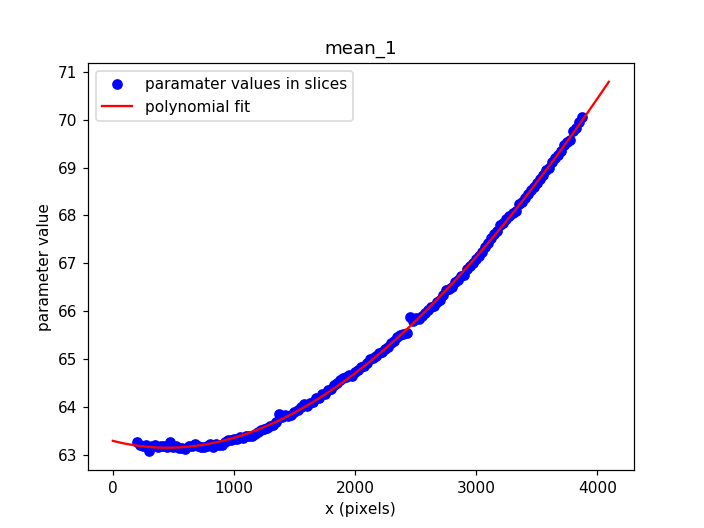

<IPython.core.display.Javascript object>


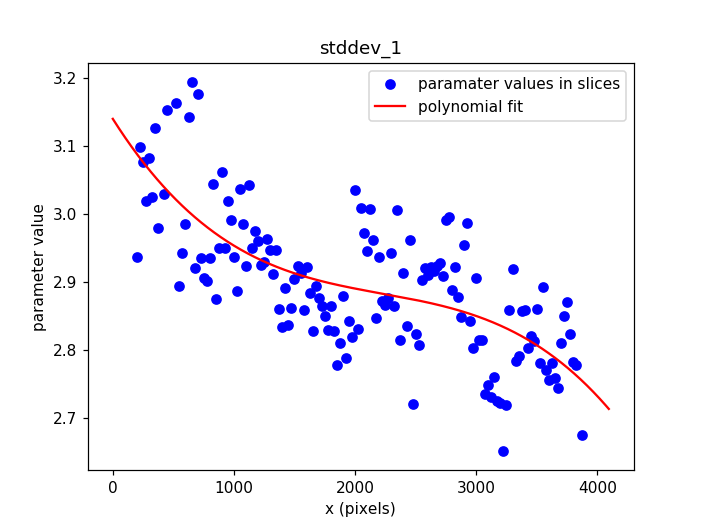

<IPython.core.display.Javascript object>


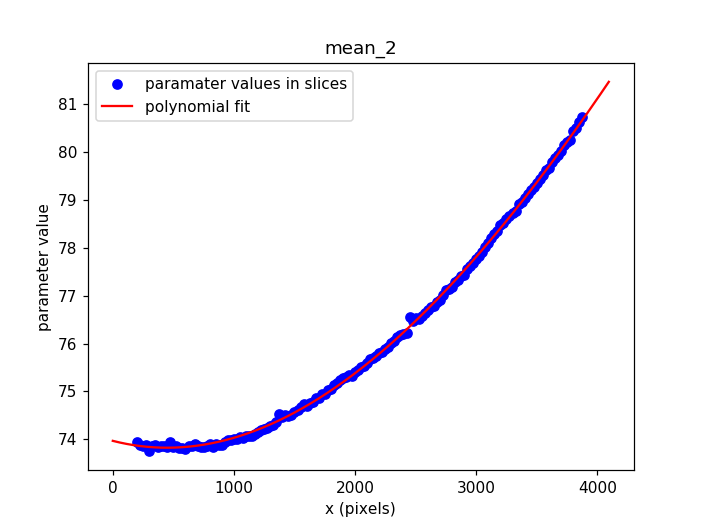

<IPython.core.display.Javascript object>


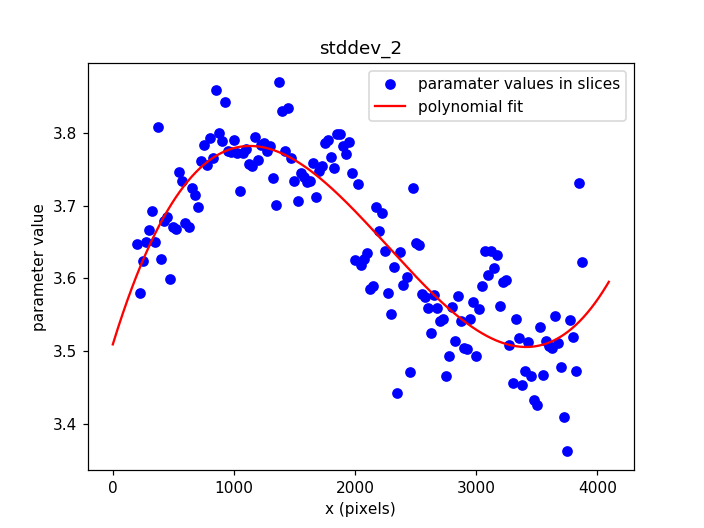

<IPython.core.display.Javascript object>


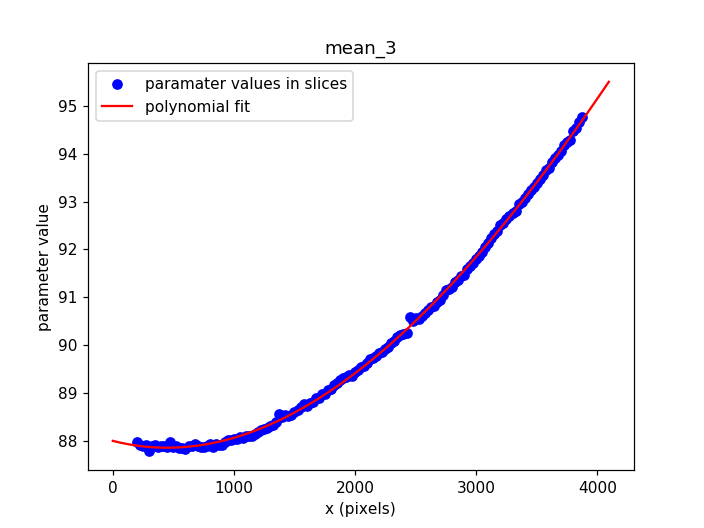

<IPython.core.display.Javascript object>


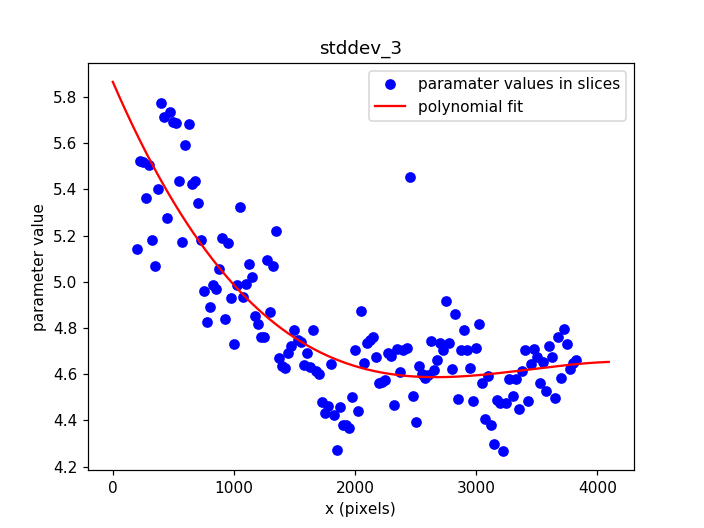

In [15]:
spec1.find_and_trace(mod_new, stepsize=25, fitorder={'stddev_1':3, 'stddev_2':3, 'gamma_2':3, 'alpha_2':3},
                    fitrange=[200,3900])  

Fitting to 3 components, plus a background
Extracting the spectrum.  Please be patient
 Extraction range (pixels): 0 - 4096
Fitting to the trace at 4096 segments
  of the 2D spectrum with stepsize=1 pix ...
 Spectrum Start:     0.00
 Spectrum End:     4095.00
 Dispersion (1st pixel):   1.00
 Dispersion (average):      1.00

 Spectrum Start:     0.00
 Spectrum End:     4095.00
 Dispersion (1st pixel):   1.00
 Dispersion (average):      1.00

 Spectrum Start:     0.00
 Spectrum End:     4095.00
 Dispersion (1st pixel):   1.00
 Dispersion (average):      1.00


Plotting the spectrum


<IPython.core.display.Javascript object>


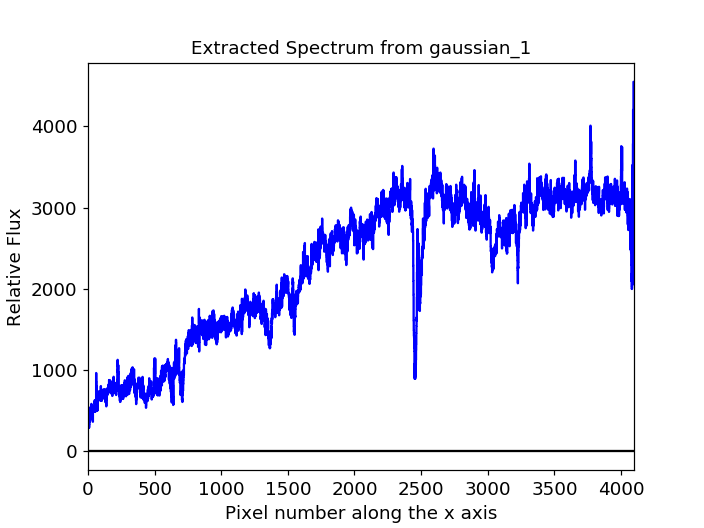

<IPython.core.display.Javascript object>


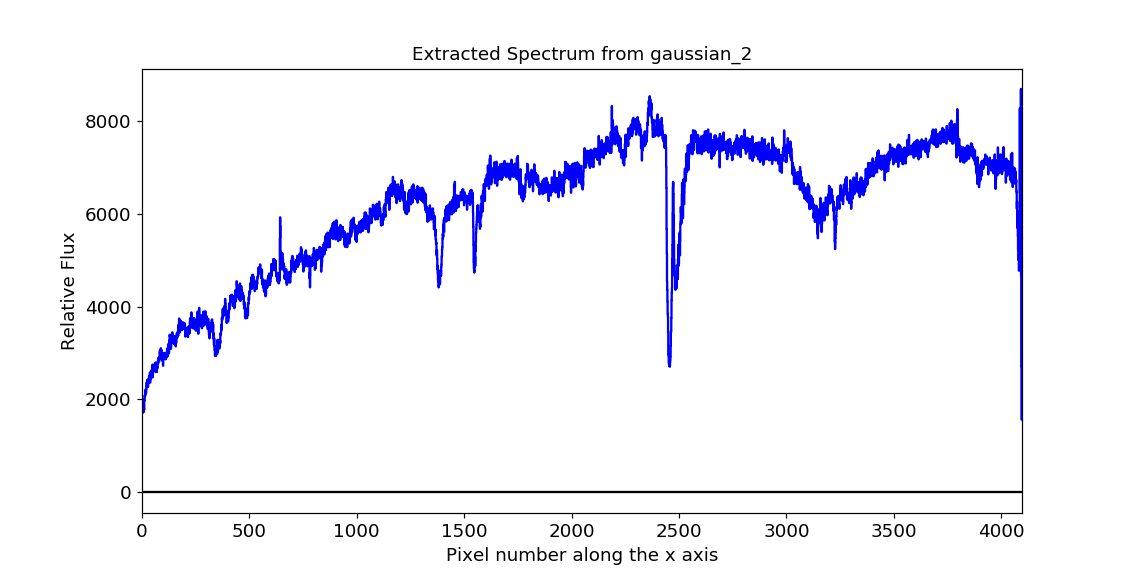

<IPython.core.display.Javascript object>


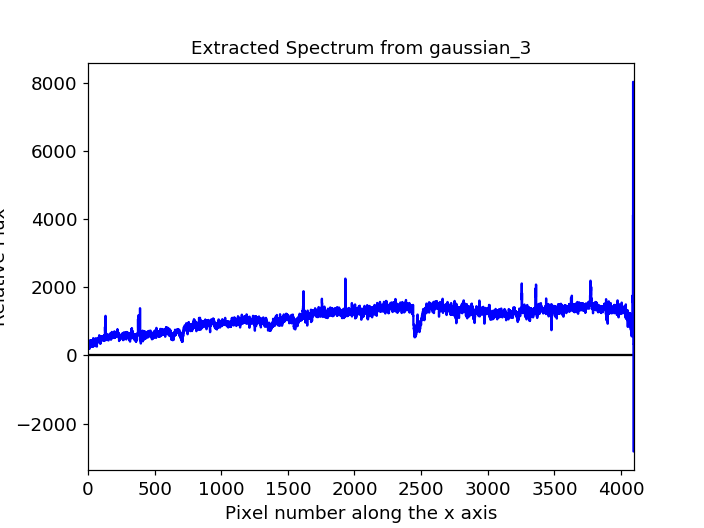

In [16]:
spec1.extract(method='modelfit')

Fitting to 3 components, plus a background
Extracting the spectrum.  Please be patient
 Extraction range (pixels): 0 - 4096
Fitting to the trace at 4096 segments
  of the 2D spectrum with stepsize=1 pix ...
 Spectrum Start:     0.00
 Spectrum End:     4095.00
 Dispersion (1st pixel):   1.00
 Dispersion (average):      1.00

 Spectrum Start:     0.00
 Spectrum End:     4095.00
 Dispersion (1st pixel):   1.00
 Dispersion (average):      1.00

 Spectrum Start:     0.00
 Spectrum End:     4095.00
 Dispersion (1st pixel):   1.00
 Dispersion (average):      1.00


Plotting the spectrum


<IPython.core.display.Javascript object>


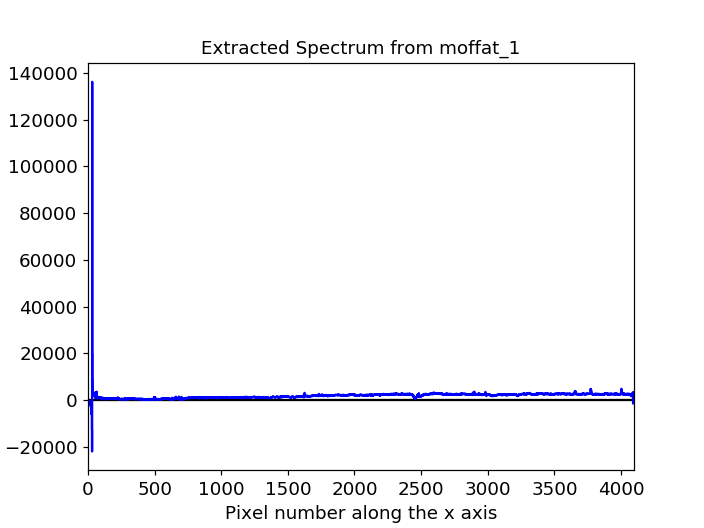

<IPython.core.display.Javascript object>


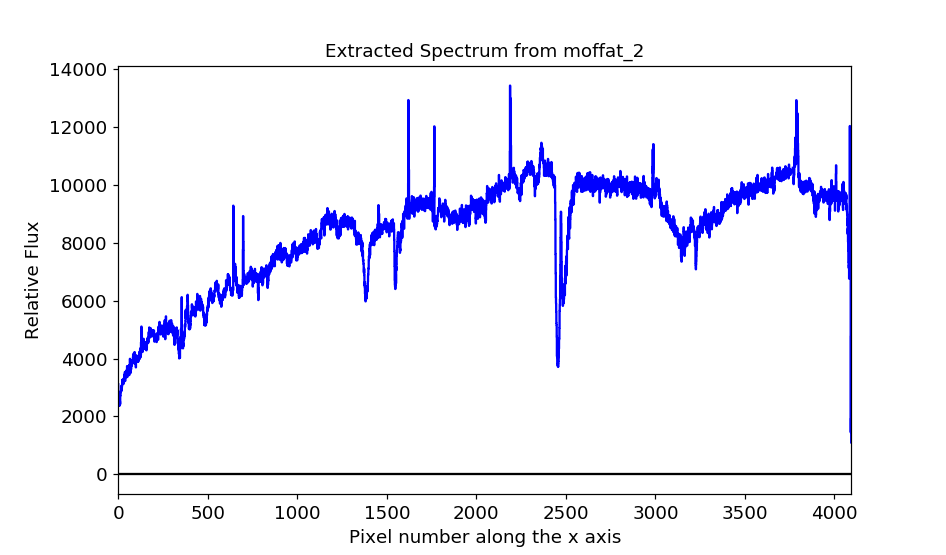

<IPython.core.display.Javascript object>


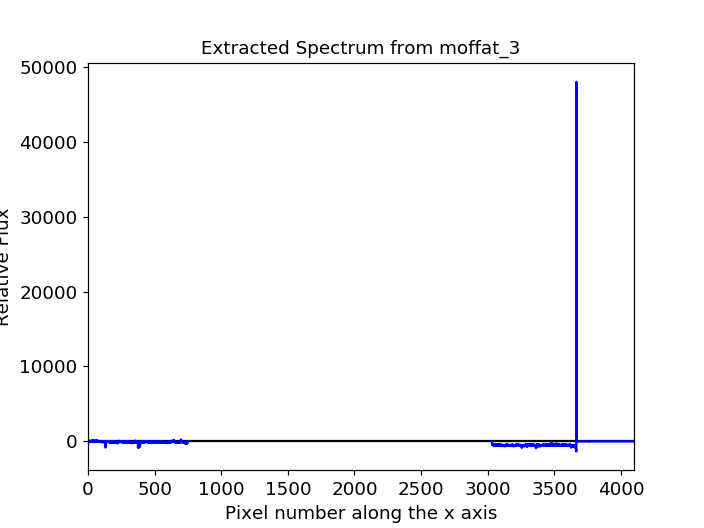

In [19]:
spec1.extract(method='modelfit')

### The following is the extracted and smoothed spectra for the primary peak.

In [ ]:
print(spec1.spectra[1][0])
spec1.spectra[1][1].smooth(11)

### In the above smoothed spectra I guess there is Mg b line at around 5907 A. The calculated redshift from this line is 0.144.

<IPython.core.display.Javascript object>


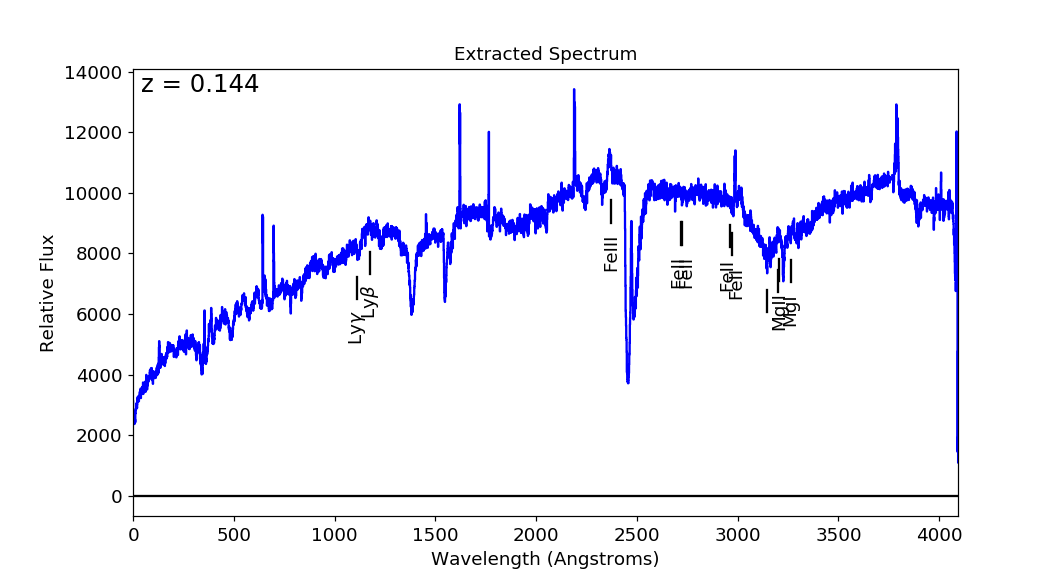


Line        lambda_rest  lambda_obs
----------  -----------  -----------
Ly-gamma       972.54       1112.59
Ly-beta       1025.70       1173.40
Fe III        2075.00       2373.80
Fe II         2375.00       2717.00
Fe II         2383.00       2726.15
Fe II         2587.00       2959.53
Fe II         2600.00       2974.40
Fe II         2750.30       3146.34
Mg II         2795.53       3198.09
Mg II         2802.71       3206.30
Mg I          2852.00       3262.69



In [18]:
#spec1.spectra[1][1].smooth()
spec1.spectra[1][1].plot()
spec1.spectra[1][1].mark_lines('abs', z=0.144)#, usesmooth=True)
#spec1.spectra[1][1].mark_lines('em', z=0.144)#, usesmooth=True)
#spec1.spectra[0][1].mark_lines('strongem', z=0.561, usesmooth=True)

### In the below smoothed spectra Ca K+H lines are prominent with the around 4000A line break. The calculated redshift from these two lines is 0.562.

In [ ]:
spec1.spectra[0][1].smooth(7)
spec1.spectra[0][1].mark_lines('abs', z=0.561, usesmooth=True)
spec1.spectra[0][1].mark_lines('em', z=0.561, usesmooth=True)
#spec1.spectra[2][1].mark_lines('strongem', z=0.561, usesmooth=True)

In [ ]:
spec1.spectra[1][1].save('spec1d_0031_J0040_LRISr_2020Nov21_modelfit_three_moffat.fits', outformat='fits')

In [ ]:
#spec1.spectra[1][1].save('spec1d_J0805_LRISr_modelfit_secondary_two_gaussian.fits', outformat='fits')

In [ ]:
import numpy as np

In [ ]:
np.max(spec1.fitpars['x_0_3'] - spec1.fitpars['x_0_2'])

In [ ]:
spec1.data

In [ ]:
spec1['skysub'].data

In [ ]:
np.max(spec1.fitpars['amplitude_2'])

In [ ]:
spec1.flux['gaussian_2']